# **Druggability Assessment with Fpocket and Machine Learning**



Author: Anamika Yadav

## Table of Contents:
* [Introduction](#introduction)
  * [Understanding Druggability](#concept)
  * [Methods to assess drugabililty](#method)
  * [Application of Machine Learning in Druggability Assessment](#application)
* [Practical Application of Machine Learning for Druggability Prediction](#classifcation)
  * [Building a dataset](#building)
  * [Fpocket to idneitfy binding pockets](#fpocket)
  * [ML model to classify the binding pockets](#ml)

## **Introduction**



In this tutorial, we will explore the concept of druggability and its crucial role in identifying successful drug targets. We will then apply a machine learning model to classify drug targets as highly druggable or less druggable, helping us assess the potential of a protein to be effectively targeted by a drug.



### **Understanding  Druggability** <a name="concept"></a>


 **Protein Pockets**

Protein pockets, also known as binding pockets or active sites, are regions on the surface of a protein where small molecules, such as drugs, can bind. These pockets are formed by the three-dimensional folding of the protein. Protein pockets are characterized by specific amino acids lining the pocket that interact with ligands through various forces, such as hydrogen bonds, hydrophobic interactions, van der Waals forces, and ionic bonds. These pockets are crucial as they can be active sites where catalytic activity occurs, or allosteric sites where binding modulates the protein's function without directly involving the active site.

Identifying protein pockets or binding sites on disease-related proteins is essential for selecting targets for new drugs. Once a binding site is known, drugs can be designed to fit precisely into these sites, enhancing their efficacy and reducing side effects. Understanding the binding site helps in modifying drug molecules to increase their affinity and specificity.

Binding sites are central to the concept of druggability, as they are the points of interaction between a drug and its target protein. The characteristics of binding sites, such as their geometric and chemical properties, determine whether a protein can be effectively targeted by a drug. By understanding and analyzing these sites, we can identify druggable targets, design and optimize drugs, and predict the druggability of new proteins, ultimately facilitating the development of effective and safe therapeutic agents.

To learn more about binding sites, check out this additional DeepChem tutorial on the topic: [Introduction to Binding Sites](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Binding_Sites.ipynb)



 **Druggability**

Druggability is the measure of whether a biological drug target, like a protein, can be effectively targeted and modulated by a drug to treat a disease. It basically refers to how suitable a protein is for being targeted by a drug. Not all proteins are good drug targets. A druggable protein has certain characteristics that make it possible to design a drug to interact with it effectively. For instance, a druggable protein must have accessible and well-defined binding sites or pockets that can interact with drug molecules.




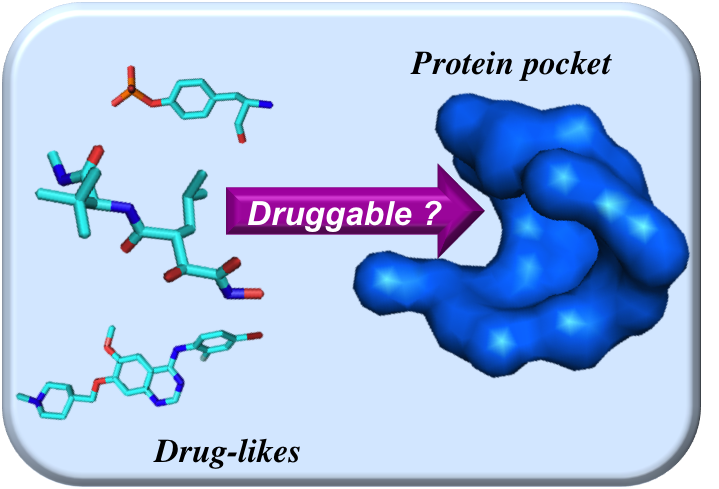

Fig. 1: Druggable pocket correspond to a protein region capable of binding a drug-like molecule.([source](https://pockdrug.rpbs.univ-paris-diderot.fr/images/intro_3D.png))


**Properties of a Druggable Target**

Structurally, a druggable target must have well-defined binding pockets where potential drugs can bind. These pockets, identified through techniques like X-ray crystallography or computational modeling, should be of suitable size, shape, and chemical composition to accommodate drug-like molecules.

The identification and characterization of binding pockets involve a detailed analysis of their key properties, including volume, hydrophobicity, and the presence of polar residues. The volume of a binding pocket dictates the size of the ligands that can be accommodated, with larger pockets able to bind larger or more complex molecules, offering more points of interaction. However, excessively large pockets can sometimes be less selective, leading to off-target effects. Hydrophobic regions within the binding pocket interact with non-polar parts of drug molecules through van der Waals forces and hydrophobic interactions, crucial for the binding stability of many drugs, particularly those targeting intracellular proteins where the environment is less aqueous. Polar residues within the pocket can form hydrogen bonds and ionic interactions with the drug, which are often key determinants of binding affinity and specificity. The distribution and accessibility of these polar residues are carefully analyzed to optimize drug design.

Another critical aspect of binding pockets is their dynamic behavior and flexibility. Binding pockets are not always static; they can undergo conformational changes upon ligand binding. This dynamic behavior, known as induced fit, allows the pocket to better accommodate different ligands, enhancing binding affinity and specificity. Molecular dynamics simulations are particularly useful in studying these conformational changes, providing insights into how flexible pockets can adapt to various drug molecules. Understanding this flexibility is essential for designing drugs that can bind effectively even as the protein changes shape.

The balance between hydrophobic and hydrophilic areas within the pocket also influences the type of ligands that can bind effectively. Hydrophobic pockets are better suited for non-polar ligands, while hydrophilic or polar pockets favor ligands that can form hydrogen bonds and ionic interactions. The density and distribution of alpha spheres, geometric constructs used to model the cavities within binding pockets, help in understanding the compactness and accessibility of the pocket. A high alpha sphere density typically indicates a well-defined pocket with the potential for strong ligand interactions. Additionally, the surface area of the pocket, particularly the solvent-accessible surface area (SASA), is crucial as it indicates how much of the pocket is exposed and available for binding, providing further insights into the druggability of the target.



**Why is Druggability Important?** <a name="importance"></a>


Before investing a lot of time and money into developing a new drug, scientists want to ensure that the target they are aiming at has a good chance of responding to a drug. If a target is druggable, it means there's a better chance that a drug can bind to it, affect its function, and ultimately help treat the disease.  This helps prioritize targets that are more likely to lead to successful drug development.

Despite decades of experimental investigations in the drug discovery domain, about 96% overall failure rate has been recorded in drug development due to the “undruggability” of various identified disease targets and other challenges.

Druggability assessment of a target protein is crucial for several reasons:

1. **Prioritizing "Druggable" Pockets:**  Not all regions of a promising target protein are suitable for drug binding. Druggability assessment tools, such as fpocket or SiteMap, are employed to identify pockets on the protein surface that are amenable to drug interaction. These pockets should be accessible, possess favorable physicochemical properties (such as hydrophobicity and the presence of hydrogen bond donors/acceptors), and ideally, should not be essential for the protein's normal function to avoid potential side effects if the pocket is targeted by a drug.

2. **Reducing Risks of Off-Target Effects:**  Off-target effects occur when a drug interacts with unintended proteins, leading to adverse side effects. By conducting a thorough druggability assessment, researchers can identify target proteins with minimal risk of such interactions. This involves analyzing the protein’s structure and sequence to detect potential promiscuous binding sites that might interact with a broad range of molecules, thereby increasing the risk of off-target effects.

3. **Predicting Potential Safety Issues:** Druggability assessment can also highlight potential safety concerns related to targeting specific proteins. For instance, if the target protein shares significant structural or sequence similarity with proteins involved in critical biological processes, inhibiting it could lead to unintended consequences. This consideration is essential to avoid disrupting essential functions that could lead to toxicity or other adverse effects .




### **Methods for Druggability Assessment** <a name="method"></a>




Experimental druggability assessments often utilize high-throughput or NMR-based screening with libraries of molecules that exhibit lead-like characteristics. However, the high cost of equipment and the potential for ambiguous results, often due to insufficient compound libraries, limit the effectiveness of these experimental approaches. As a result, computational methods have gained prominence in recent decades, particularly those based on virtual screening and machine learning. These approaches typically involve four primary druggability assessment methods: 

**1. Sequence-Based Druggability Assessment:**

Sequence-based methods analyze the amino acid sequence of a protein to predict its potential as a drug target. The sequence of amino acids determines the protein's function and can reveal conserved regions that may form binding pockets for drugs. This method also provides insights into essential physicochemical properties such as solvent accessibility, hydrophobicity, charge, and polarity.

Sequence-based assessments are often used in machine-learning algorithms to predict druggability. They can help identify functional domains within a protein. However, relying solely on sequence data can be limiting, as it does not provide a full picture of the protein's structure or how accessible these domains are to drug molecules.

Examples include [CHEMBL](https://www.ebi.ac.uk/chembl/), [LncRNA2Target](https://ngdc.cncb.ac.cn/databasecommons/database/id/27), and [MiRBase](https://www.mirbase.org/), which are databases and tools that aid in predicting druggability based on protein sequences.

**2. Structure-Based Druggability Assessment:**

Structure-based methods examine the 3D structure of a protein to identify and evaluate potential drug-binding pockets. For a small drug-like molecule to effectively bind, the protein must have a pocket that is appropriately sized, with a deep hydrophobic cavity to encapsulate the drug. Large, exposed polar sites are generally less druggable compared to smaller, more hydrophobic pockets.

This method provides a more detailed and reliable prediction compared to sequence-based methods, as it considers the physical characteristics of the protein's binding sites. The identified pockets are then compared against a reference set of known biological targets to assess their druggability.

Notable tools include [DOGSiteScorer](https://proteins.plus/help/dogsite), [Metapocket](https://www.liebertpub.com/doi/10.1089/omi.2009.0045), [Fpocket](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-10-168), [PockDrug Server](https://pockdrug.rpbs.univ-paris-diderot.fr/cgi-bin/index.py?page=home), [SiteMap](https://www.schrodinger.com/platform/products/sitemap/), and [Open Targets](https://platform.opentargets.org/), which help identify and analyze potential drug-binding pockets.

**3. Ligand-Based Druggability Assessment:**

Ligand-based methods focus on the likelihood that a protein can bind to known drug-like molecules, called ligands. By examining endogenous compounds and their interactions with the target, researchers can predict how well a new drug might interact with the protein.

This approach leverages existing data on ligands and their binding capabilities, which can provide valuable insights when predicting the druggability of new targets.

Examples include [BindingDB](https://www.bindingdb.org/), [PubChem](https://pubchem.ncbi.nlm.nih.gov/), [SwissTargetPrediction](http://www.swisstargetprediction.ch/) and [TargetHunter](https://www.cbligand.org/TargetHunter/), which are comprehensive databases of ligand-protein interactions.

**4. Precedence-Based Druggability Assessment:**

This method relies on historical data of proteins that have already been successfully targeted by drugs. If a similar protein has proven to be druggable in the past, it is more likely that a new, related target will also be druggable.

Precedence-based methods offer the highest confidence in druggability predictions because they are based on proven, established targets. However, while this method provides a strong basis for predicting success, it does not guarantee that new drugs targeting similar proteins will succeed.

Databases such as [DrugBank](https://go.drugbank.com/), [ClinicalTrials.gov](https://clinicaltrials.gov/), and [DrugCentral](https://drugcentral.org/) store detailed information on existing drug targets and compounds currently undergoing clinical trials.


### **Application of Machine Learning in Druggability Assessment** <a name="application"></a>



Machine-learning (ML) based methodologies can handle vast datasets, extract complex patterns, provide more accurate predictions, and reduce human bias, ultimately speeding up the druggability assessment. Various machine learning algorithms have been employed to develop in silico models for the druggability assessment which help to analyse biological data, predict binding site interactions, and identify potential drug target and drug candidates.

The ML methods are categorized into supervised and unsupervised learning techniques, each serving different purposes within the drug discovery pipeline.
- The supervised learning focuses on tasks where the outcome is known and involves models like decision trees, random forests, SVM, and Bayesian networks for tasks ranging from disease-druggability predictions to target identification.

- Unsupervised Learning involves clustering techniques like K-Means, hierarchical clustering, and HMM for tasks like molecular designing and feature selection.



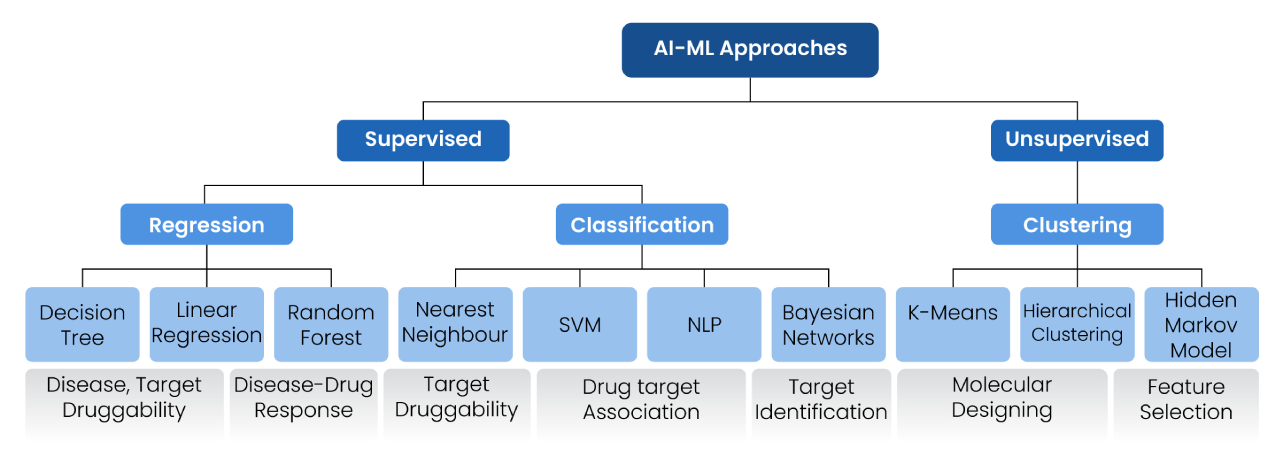
Fig 2 : Methods to predict the druggability based on machine learning ([Source](https://www.excelra.com/whitepaper/identifying-druggable-therapeutic-targets-unveiling-promising-avenues-in-drug-discovery/))



**Note:** For information on various ML models, please refer to the ML resources provided at the end of this tutorial. In this section, we will concentrate on the application of ML approaches specifically in druggability assessment.


Fig 2 illustrates how various AI and machine learning (ML) techniques are applied in the assessment of druggability.

In Supervised Learning, models like Decision Trees and Random Forest are used to predict the druggability of a target, such as a protein involved in a disease. These models can also predict the disease-drug response, which helps determine how well a drug might work in treating a specific disease. Classification methods, like Nearest Neighbour and SVM (Support Vector Machine), are used for drug target association, identifying which drugs are likely to interact with which targets. NLP (Natural Language Processing) helps analyze vast amounts of scientific literature to uncover potential drug targets, while Bayesian Networks assist in target identification, pinpointing which proteins or molecules are the best candidates for drug development.

Unsupervised Learning focuses on Clustering techniques, such as K-Means and Hierarchical Clustering, which group similar molecules or biological data together. This is crucial for molecular designing, where scientists design new drugs based on the properties of these clusters. Hidden Markov Models (HMM) are used for feature selection, identifying the most important characteristics of a protein that determine its druggability.

**Application ML and AI based approaches in different Druggability Assessment methods:**


**1. Sequence-Based Druggability Assessment:**
- Supervised Learning:
Nearest Neighbour, SVM, and Random Forest can be used to predict the druggability of a target based on its sequence features (like amino acid composition and conserved regions).
NLP techniques can process and extract relevant information from genetic databases or literature to predict potential binding sites based on sequence data.
- Unsupervised Learning :
Hierarchical Clustering and K-Means can group protein sequences into clusters based on their similarities, which helps in identifying conserved regions or sequence motifs linked to druggability.

**2. Structure-Based Druggability Assessment:**
- Supervised Learning:
Decision Trees and Bayesian Networks can predict whether specific structural features (like the size and hydrophobicity of binding pockets) make a protein druggable.
Random Forest models can aggregate predictions about various structural features to give a more accurate overall assessment.
- Unsupervised Learning:
Hidden Markov Models (HMMs) can model protein structural dynamics and predict how likely a given binding site is to interact with a drug.
K-Means clustering can identify common structural features across different proteins that correlate with druggability.

**3. Ligand-Based Druggability Assessment:**
- Supervised Learning:
SVM and NLP can be used to predict drug-target associations by analyzing known ligands and their binding affinities with various proteins.
Random Forest models can improve the accuracy of these predictions by considering multiple ligand features simultaneously.
- Unsupervised Learning:
K-Means and Hierarchical Clustering can group ligands based on their chemical properties, aiding in the identification of new ligand-based druggable targets.

**4. Precedence-Based Druggability Assessment:**
- Supervised Learning:
Bayesian Networks and Decision Trees can help in predicting the success of new targets by analyzing previous data on established drug targets and their associated compounds.
Random Forests can combine different data points from established targets to predict the druggability of new, similar targets.
- Unsupervised Learning:
HMMs can be used to model the progression of drug development for targets with existing precedents, helping in feature selection and identifying key characteristics of successful targets.

## **Practical Application of Machine Learning for Druggability Prediction** <a name="classifcation"></a>





With a solid understanding of druggability and the application of machine learning (ML) in druggability assessment, we are now ready to conduct an experiment to classify protein targets into 'highly druggable' and 'less druggable' categories using a Random Forest model.

Our dataset consists of proteins paired with their corresponding druggability labels - 'highly druggable' and 'less druggable'. To identify the druggable pockets within these proteins, we’ll utilize Fpocket, a structure-based druggability assessment tool. Fpocket excels at identifying and characterizing pockets on the surface of proteins, which are potential binding sites for small molecules. These pockets are key regions where drug molecules might interact with the protein to exert a therapeutic effect.



The experiment involves two primary steps:

1. **Identifying Druggable Pockets**: Using [Fpocket](https://github.com/Discngine/fpocket), we will analyze the protein structures to find pockets that might serve as effective binding sites for small molecules. Fpocket evaluates various characteristics of these pockets, such as size, shape, depth, and hydrophobicity, which are crucial indicators of druggability.

2. **Training the Random Forest Model**: Once we have characterized the pockets, the Random Forest model will be trained on these features along with the corresponding druggability labels.  [Random Forest](https://towardsdatascience.com/random-forest-classification-678e551462f5) is a machine learning algorithm that uses multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. It operates by constructing a multitude of [decision trees](https://en.wikipedia.org/wiki/Decision_tree) during training and outputs either the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees. The algorithm improves the accuracy and robustness of predictions by averaging the results from multiple decision trees, reducing the risk of overfitting and handling complex data with higher reliability. The model will learn to distinguish between 'highly druggable' and 'less druggable' pockets based on the patterns it identifies in the training data. After training, the model can classify new protein pockets as either highly druggable or less druggable with a high degree of accuracy.

While this model will provide valuable insights into whether a protein pocket is likely to be druggable, it’s crucial to remember that druggability is just one aspect of a protein’s potential as a drug target. Other important factors to consider include:
- Biological Relevance: The role of the protein in disease processes and whether modulating this protein will have a therapeutic effect.
- Feasibility: Practical considerations such as how easily a drug can reach the target protein in the body, and whether the protein is expressed in the right tissues at the right levels.
- Off-target effects: The potential for off-target effects and toxicity, which could arise if the protein is similar to other essential proteins in the body.

### **Building the Dataset** <a name="building"></a>


In this tutorial we'll use the NRLD dataset which has been widely used to study the druggability. It is a comprehensive, nonredundant data set containing crystal structures of 71 highly druggable and 44 less druggable proteins  compiled by literature search and data mining published in the paper : [DrugPred: A Structure-Based Approach To Predict Protein Druggability Developed Using an Extensive Nonredundant Data Set](https://pubs.acs.org/doi/10.1021/ci200266d)

The authors have only published the list of PDB code along with the labels. So, we'll first fetch the protein structure using Biopython. The labels are **'D'** for highly druggable and **'N'** for less druggable protein targets.

You can also use your own dataset if you have the labels. To obtain the structure of protein from your dataset you can refer the DeepChem tutorial: [Protein Structure Prediction with ESMFold](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Protein_Structure_Prediction_with_ESMFold.ipynb).

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.9 MB/s eta 0:00:00


In [ ]:
proteins_list = ['1pwm', '1lox', '3etr', '3f1q', '3ia4', '2cl5', '1uou', '1t46', '1unl', '1q41', '2i1m', '1pmn', '1fk9', '1e66', '1xoz', '1owe', '1r55', '3f0r', '1oq5', '1kzn', '2aa2', '3b68', '1sqn', '1v16', '3jdw', '1ajs', '1wvc', '1kc7', '1mai', '1px4', '1od8', '1bmq', '1bls', '1m0n', '1ec9', '1b74', '1g98', '1e9x', '1hw8', '1sqi', '1r9o', '4cox', '1c14', '2bxr', '2gh5', '1hvy', '1rsz', '1n2v', '1v4s', '1u4d', '1m17', '2dq7', '1qpe', '1qhi', '2fb8', '1ke6', '2br1', '1ywr', '2ivu', '2hiw', '2i0e', '1ywn', '1ig3', '1yvf', '1k8q', '1kvo', '1xm6', '1udt', '1u30', '1r58', '1rwq', '1lpz', '2g24', '1hvr', '1gkc', '1yqy', '1o5r', '1js3', '1k7f', '1j4i', '1vbm', '1rv1', '1gwr', '1m2z', '3d4s', '1ai2', '3pcm', '1d09', '1c9y', '1gpu', '1qmf', '1moq', '1ucn', '1t03', '1qs4', '1fth', '1rnt', '1onz', '1x9d', '1nnc', '1olq', '1jak', '1kts', '1nlj', '1icj', '1hqg', '2gsu', '1g7v', '1f9g', '1qxo', '2gyi', '1o8b', '1cg0']
labels = ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [ ]:
from Bio.PDB import PDBList
from Bio.PDB import PDBParser
import os
import pandas as pd


def fetch_protein_structure(pdb_code, save_dir):
    """
    Fetches the protein structure for a given PDB code and saves it to the specified directory.
    Also returns the structure in a dictionary with the PDB code as the key.

    Parameters:
    pdb_code (str): The PDB code of the protein structure to fetch.
    save_dir (str): The directory where the PDB file will be saved.

    Returns:
    dict: A dictionary with the PDB code as the key and the structure as the value.
    """
    try:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        pdbl = PDBList()
        # Retrieve the PDB file and save it with a .pdb extension
        pdb_file_path = pdbl.retrieve_pdb_file(pdb_code, pdir=save_dir, file_format='pdb')
        new_pdb_file_path = os.path.join(save_dir, f"{pdb_code}.pdb")
        os.rename(pdb_file_path, new_pdb_file_path)

        # Parse the PDB file
        parser = PDBParser(PERMISSIVE=1)
        structure = parser.get_structure(pdb_code, new_pdb_file_path)

        # Return the structure in a dictionary
        return {pdb_code: structure}

    except Exception as e:
        print(f'Error fetching structure for PDB code {pdb_code}: {e}')
        return {pdb_code: None}




Specify the save directory and fetch the protein structure

In [ ]:
save_directory = '/content/pdb_files/'

for protein in proteins_list:
  pdb_code = protein
  pdb_file_path = fetch_protein_structure(pdb_code, save_directory)


### **Fpocket to find the binding pockets** <a name="fpocket"></a>

Fpocket is a computational tool used to identify and characterize pockets on the surface of proteins. These pockets are potential binding sites for small molecules, making fpocket a valuable tool for drug discovery and development. By identifying and analyzing these pockets, we can better understand protein function and identify targets for drug design.

#### Install the requirements

In [ ]:
!apt-get install -y build-essential git
# Clone the fpocket repository
!git clone https://github.com/Discngine/fpocket.git
%cd fpocket
!make

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'fpocket'...
remote: Enumerating objects: 11316, done.
remote: Counting objects: 100% (5152/5152), done.
remote: Compressing objects: 100% (1379/1379), done.
remote: Total 11316 (delta 3897), reused 4572 (delta 3764), pack-reused 6164
Receiving objects: 100% (11316/11316), 127.93 MiB | 21.88 MiB/s, done.
Resolving deltas: 100% (7346/7346), done.
Updating files: 100% (3895/3895), done.
/content/fpocket
cd src/qhull/ && make
make[1]: Entering directory '/content/fpocket/src/qhull'
mkdir -p bin lib
gcc -c -O3 -ansi -Isrc -fpic -Wall -Wcast-qual -Wextra -Wwrite-strings -Wshadow -o src/rbox/rbox.o src/rbox/rbox.c
gcc -c -O3 -ansi -Isrc -fpic -Wall -Wcast-qual -Wextra -Wwrite-strings -Wshadow -o src/libq

#### Run Fpocket for each of the protein and save the output in output directory

In [ ]:
import subprocess
def run_fpocket(pdb_file_path):
    """
    Runs fpocket on the given PDB file to find binding pockets.

    Parameters:
    pdb_file_path (str): The path to the PDB file.

    Returns:
    str: The path to the fpocket output directory.
    """
    try:
        # Run fpocket
        command = ["bin/fpocket", "-f", pdb_file_path]
        subprocess.run(command, check=True)

        # Extract the output directory path
        pdb_base = os.path.basename(pdb_file_path).split('.')[0]
        output_dir = f"{pdb_base}_out"
    except subprocess.CalledProcessError as e:
        print(f'Error running fpocket on {pdb_file_path}: {e}')
        return None

Specify the base directory where the pdb files are stored

In [ ]:
base_pdb_files = '/content/pdb_files/'

Run Fpocket

In [ ]:
for protein in proteins_list:
  protein_structure = os.path.join(base_pdb_files, f'{protein}.pdb')
  run_fpocket(protein_structure)

Let's have a look at the fpocket output



In [ ]:
# We'll have a look at the protein /content/pdb_files/1ajs_out

fpocket_info_dir = '/content/pdb_files/1ajs_out/1ajs_info.txt'
with open(fpocket_info_dir, 'r') as file:
  for line in file:
    print(line.strip())


Pocket 1 :
Score : 	0.924
Druggability Score : 	0.535
Number of Alpha Spheres : 	95
Total SASA : 	9.960
Polar SASA : 	7.544
Apolar SASA : 	2.415
Volume : 	493.527
Mean local hydrophobic density : 	21.440
Mean alpha sphere radius :	3.774
Mean alp. sph. solvent access : 	0.449
Apolar alpha sphere proportion : 	0.263
Hydrophobicity score:	26.957
Volume score: 	 4.348
Polarity score:	 14
Charge score :	 4
Proportion of polar atoms: 	49.020
Alpha sphere density : 	5.127
Cent. of mass - Alpha Sphere max dist: 	11.895
Flexibility : 	0.031

Pocket 2 :
Score : 	0.323
Druggability Score : 	0.615
Number of Alpha Spheres : 	83
Total SASA : 	157.049
Polar SASA : 	99.083
Apolar SASA : 	57.966
Volume : 	479.790
Mean local hydrophobic density : 	15.053
Mean alpha sphere radius :	3.795
Mean alp. sph. solvent access : 	0.423
Apolar alpha sphere proportion : 	0.229
Hydrophobicity score:	21.000
Volume score: 	 4.100
Polarity score:	 6
Charge score :	 1
Proportion of polar atoms: 	54.167
Alpha sphere densi

Now, let's find the pocket with the highest druggability score in each of the target proteins and store its features in a DataFrame for training a model in the next step.


In [ ]:
import re

def identify_most_druggable_pocket(pocket_df):
  # Find the pocket with the highest druggability score
  pocket_df['Druggability Score'] = pocket_df['Druggability Score'].astype(float)
  best_pocket_df = pocket_df.loc[pocket_df['Druggability Score'].idxmax()]
  best_pocket_df = pd.DataFrame(best_pocket_df).T
  return best_pocket_df

def extract_features(pocket_info):
  pocket_data = []
  # Read the file content line by line
  with open(pocket_info, 'r') as file:
    current_pocket_info = {}
    for line in file:
        if "Pocket" in line:
            if current_pocket_info:
                pocket_data.append(current_pocket_info)
            current_pocket_info = {'Pocket': line.strip()}
        else:
            if ':' in line:
                key, value = line.split(':')
                current_pocket_info[key.strip()] = value.strip()

    # Append the last pocket information
    if current_pocket_info:
        pocket_data.append(current_pocket_info)

  # Convert the list of dictionaries to a DataFrame
  pocket_df = pd.DataFrame(pocket_data)
  pocket_df.drop(columns=['Pocket'], inplace=True)
  return pocket_df





In [ ]:
pocket_dataset = {}
for protein in proteins_list:
  pocket_info = f'{base_pdb_files}{protein}_out/{protein}_info.txt'
  pocket_df = extract_features(pocket_info)
  best_pocket_df = identify_most_druggable_pocket(pocket_df)
  pocket_dataset[protein] = best_pocket_df

# Combine all dataframes into one with a new column for the keys
dataset_fpocket = pd.concat(pocket_dataset.values(), keys=pocket_dataset.keys()).reset_index(level=0).rename(columns={'level_0': 'Key'})
dataset_fpocket.rename(columns={'Key': 'pdb code'}, inplace=True)

Add the label's to the dataset

In [ ]:
# # Set the key column as the index our dataframe from intial csv file with pdb code and labels and the dataframe we created in previous step
dataset_fpocket.set_index('pdb code', inplace=True)
# dataset.set_index('pdb code', inplace=True)

# # Merge the dataframes on the index to create a datset
# dataset_fpocket = dataset_fpocket.join(dataset, how='outer')



### **ML model to classify the binding pockets** <a name="ml"></a>

Here, we are using random forest algorithm to train our model. However, you are free to experiment with supervised model for classification of your choice.

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X = dataset_fpocket
y = labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.8695652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.71      0.83      0.77         6

    accuracy                           0.87        23
   macro avg       0.83      0.86      0.84        23
weighted avg       0.88      0.87      0.87        23



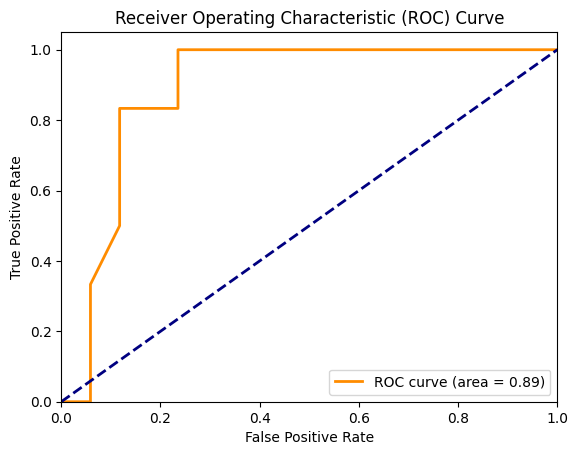

In [ ]:

# Calculate the ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
import matplotlib.pyplot as plt
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The model achieved an accuracy of 86.96%. The precision, recall, and F1-score were 0.94, 0.88, and 0.91 for class 1(highly druggable), and 0.71, 0.83, and 0.77 for class 1(less druggable), indicating strong performance overall but slightly lower precision for class 1.

#### **Classifying Your Protein's Druggability**


Let's find out if your protein is highly druggable or less druggable by following these steps. Assuming you already have the 3D structure of the protein in .pdb file format, we'll use the ML model to classify the protein pockets effectively.


1. Run Fpocket to Identify the Pockets
2. Idenitfy the pocket with highest druggable score
3. Extract the features of most druggable feature in the target
4. Use the above trained model to make a prediction

In case you do not have the 3D structure of your protein, don't worry! You have two options:

- Fetch the Structure Using PDB Code: You can use the `fetch_protein_structure` method defined above to fetch the structure using the PDB code of the protein.

- Predict the Structure Using ESMfold: If you have the protein sequence, you can use ESMfold to obtain the structure of the protein. For more information, you can refer to the DeepChem tutorial:  [Protein Structure Prediction with ESMFold](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Protein_Structure_Prediction_with_ESMFold.ipynb).


By following these steps, you can systematically determine the druggability of a protein pocket, combining advanced computational tools like Fpocket with the predictive power of machine learning. This process provides a robust method for identifying promising drug targets.


In [ ]:
fetch_protein_structure('1mbn', '/content/1mbn/')
run_fpocket('/content/1mbn/1mbn.pdb')
output_dir = '/content/1mbn'
pdb_code = '1mbn'

target_pocket_info = f'{output_dir}{pdb_code}_out/{protein}_info.txt'
target_pocket_df = extract_features(pocket_info)
best_pocket_df = identify_most_druggable_pocket(pocket_df)
prediction = label_encoder.inverse_transform(model.predict(best_pocket_df))
print(prediction)

['N']


The predicted label is 'N' which  means protein '1mbn' isn't highly druggable. Hence, it shouldn't be used as a drug target.

### **ML Resources for Druggability Assessment**



Here are some useful resources to help you understand the different ML methods mentioned in this tutorial:

#### **Supervised Learning**

##### **Regression**
- [*Understanding* Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)
- [Decision Tree Regression - An In-depth Guide](https://blog.paperspace.com/decision-trees/)
- [Linear Regression: Introduction to Linear Regression](https://www.coursera.org/learn/ml-regression)
- [Linear Regression Explained](https://aws.amazon.com/what-is/linear-regression/)
- [Random Forest: Random Forest in Machine Learning](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
- [Random Forest: A Complete Guide for Machine Learning](https://builtin.com/data-science/random-forest-algorithm#:~:text=Random%20forest%20is%20a%20machine,and%20how%20to%20use%20it.)

##### **Classification**
- [K-Nearest Neighbours Algorithm](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20KNN,used%20in%20machine%20learning%20today.)
- [Support Vector Machine (SVM): Introduction to Support Vector Machines](https://www.spiceworks.com/tech/big-data/articles/what-is-support-vector-machine/)
- [Natural Language Processing (NLP): NLP Overview](https://builtin.com/data-science/introduction-nlp)
- [Getting Started with NLP](https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners)
- [Bayesian Networks: Introduction to Bayesian Networks](https://thedecisionlab.com/reference-guide/statistics/bayesian-network)

#### **Unsupervised Learning**

##### **Clustering**
- [K-Means Clustering: K-Means Clustering Algorithm Explained](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)
- [K-Means Clustering with Python](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Hierarchical Clustering: Understanding Hierarchical Clustering](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)
- [Hidden Markov Model (HMM): Introduction to Hidden Markov Models](https://www.theaidream.com/post/introduction-to-hidden-markov-model-hmm-and-its-application-in-stock-market-analysis)

Feel free to explore these resources as you progress through the notebook to deepen your understanding of the ML methods used in druggability assessment.


## References

1. Hopkins, A. L., & Groom, C. R. (2002). The druggable genome. *Nature Reviews Drug Discovery*, 1(9), 727-730. DOI: [10.1038/nrd892](https://doi.org/10.1038/nrd892)

2. Yu, L., Xue, L., Liu, F., Li, Y., Jing, R., & Luo, J. (2022). The applications of deep learning algorithms on in silico druggable proteins identification. Journal of Advanced Research, 41, 219-231. DOI: [10.1016/j.jare.2022.01.009](https://doi.org/10.1016/j.jare.2022.01.009)

3. Hajduk, P. J., Huth, J. R., & Tse, C. (2005). Predicting protein druggability. *Drug Discovery Today*, 10(23-24), 1675-1682. DOI: [10.1016/S1359-6446(05)03624-2](https://doi.org/10.1016/S1359-6446(05)03624-2)

4. Halgren, T. A. (2009). Identifying and characterizing binding sites and assessing druggability. *Journal of Chemical Information and Modeling*, 49(2), 377-389. DOI: [10.1021/ci800324m](https://doi.org/10.1021/ci800324m)

5. Peters, J. U. (2013). Polypharmacology–foe or friend? *Journal of Medicinal Chemistry*, 56(22), 8955-8971. DOI: [10.1021/jm400856t](https://doi.org/10.1021/jm400856t)

6. Ashley, E. A. (2016). Towards precision medicine. *Nature Reviews Genetics*, 17(9), 507-522. DOI: [10.1038/nrg.2016.86](https://doi.org/10.1038/nrg.2016.86)

7. Agoni, C., Olotu, F.A., Ramharack, P. et al. Druggability and drug-likeness concepts in drug design: are biomodelling and predictive tools having their say?. J Mol Model 26, 120 (2020). DOI: [10.1007/s00894-020-04385-6](https://doi.org/10.1007/s00894-020-04385-6)

8. Abi Hussein H, Geneix C, Petitjean M, Borrel A, Flatters D, Camproux AC. Global vision of druggability issues: applications and perspectives. Drug Discov Today. 22, 404–415 (2017)

9. Arrowsmith, J. Phase III and submission failures: 2007-2010. Nature Reviews Drug Discovery. 10(2), 1-2 (2011)

10. Excelra. (2024). Identifying Druggable Therapeutic Targets: Unveiling Promising Avenues in Drug Discovery. *Excelra White Paper*. Retrieved from [https://www.excelra.com/whitepaper/identifying-druggable-therapeutic-targets-unveiling-promising-avenues-in-drug-discovery/](https://www.excelra.com/whitepaper/identifying-druggable-therapeutic-targets-unveiling-promising-avenues-in-drug-discovery/)

11. Aguti R, Gardini E, Bertazzo M, Decherchi S and Cavalli A (2022) Probabilistic Pocket Druggability Prediction via One-Class Learning. Front. Pharmacol. 13:870479. DOI: [10.3389/fphar.2022.870479]((https://doi.org/10.3389/fphar.2022.870479))







# Congratulations! Time to join the Community!
Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/cGzwCdrUqS) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!

## Citing this Tutorial

If you found this tutorial useful, please consider citing it as:

```
@manual{Bioinformatics,
 title={Druggability Assessment with Fpocket and Machine Learning},
 organization={DeepChem},
 author={Yadav, Anamika },
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Druggablity_Assessment_with_Fpocket_and_Machine_Learning.ipynb}},
 year={2024},
}
```